In [21]:
import itertools
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.api import OLS
import seaborn as sns

DATABASE_NAME = "etl"
PROJECT_ID = "new-life-400922"

pd.set_option('mode.chained_assignment', None)

In [22]:
def query_ticker_data():
    sql = f"""
        SELECT *
        FROM `new-life-400922.etl.res_tickers_by_month`
    """
    # Run a Standard SQL query with the project set explicitly
    df = pd.read_gbq(sql, project_id=PROJECT_ID, dialect="standard")
    return df


def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [23]:
all = query_ticker_data()

In [24]:
apple = all[all['ticker'] == 'AAPL']
netflix = all[all['ticker'] == 'NFLX']
microsoft = all[all['ticker'] == 'MSFT']
amazon = all[all['ticker'] == 'AMZN']
alphabet = all[all['ticker'] == 'GOOGL']
coke = all[all['ticker'] == 'KO']

In [25]:
apple.name = "Apple"
netflix.name = "Netflix"
microsoft.name = "Microsoft"
amazon.name = "Amazon"
alphabet.name = "Alphabet"
coke.name = "Coca-Cola Co"

In [35]:
TARGET_DF = coke

In [44]:
TARGET_DF['lag_1'] = TARGET_DF['volume_weighted_average_price'].shift(1)

In [45]:
X = TARGET_DF.loc[:, ['lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = TARGET_DF.loc[:, 'volume_weighted_average_price']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target
model = OLS(y,X)
fitted = model.fit()
y_pred = pd.Series(fitted.predict(X), index=X.index)

In [46]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     volume_weighted_average_price   R-squared (uncentered):                   0.998
Model:                                       OLS   Adj. R-squared (uncentered):              0.998
Method:                            Least Squares   F-statistic:                          3.139e+04
Date:                           Sun, 22 Oct 2023   Prob (F-statistic):                    3.75e-82
Time:                                   13:33:57   Log-Likelihood:                         -137.49
No. Observations:                             60   AIC:                                      277.0
Df Residuals:                                 59   BIC:                                      279.1
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lag_1          1.0012      0.006    177.183      0.000       0.990       1.012
==============================================================================
Omnibus:                       37.515   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.813
Skew:                          -1.741   Prob(JB):                     2.90e-28
Kurtosis:                       9.213   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='lag_1', ylabel='volume_weighted_average_price'>

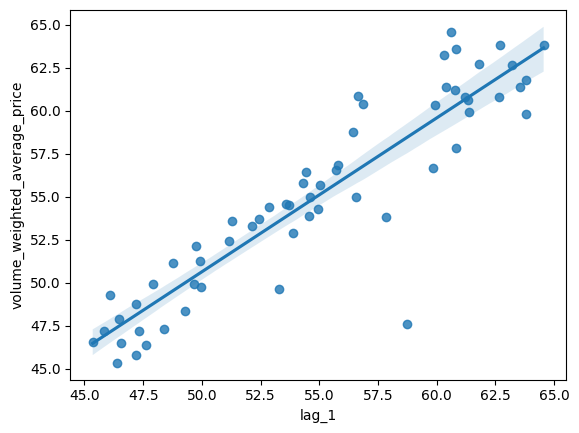

In [47]:
sns.regplot(x='lag_1', y='volume_weighted_average_price', data=TARGET_DF)